In [21]:
import os

train_crazing_dir = os.path.join('../input/neu-surface-defect-database/NEU-DET/train/images/crazing')
train_inclusion_dir = os.path.join('../input/neu-surface-defect-database/NEU-DET/train/images/inclusion/')
train_patches_dir = os.path.join('../input/neu-surface-defect-database/NEU-DET/train/images/patches/')
train_pitted_surface_dir = os.path.join('../input/neu-surface-defect-database/NEU-DET/train/images/pitted_surface/')
train_rolledin_scale_dir = os.path.join('../input/neu-surface-defect-database/NEU-DET/train/images/rolled-in_scale/')
train_scratches_dir = os.path.join('../input/neu-surface-defect-database/NEU-DET/train/images/scratches/')

In [22]:
train_crazing_names = os.listdir(train_crazing_dir)
train_inclusion_names = os.listdir(train_inclusion_dir)
train_patches_names = os.listdir(train_patches_dir)
train_pitted_surface_names = os.listdir(train_pitted_surface_dir)
train_rolledin_scale_names = os.listdir(train_rolledin_scale_dir)
train_scratches_names = os.listdir(train_scratches_dir)

In [23]:
print('total training crazing images:', len(train_crazing_names))
print('total training inclusion images:', len(train_inclusion_names))
print('total training patches images:', len(train_patches_names))
print('total training pitted_surface images:', len(train_pitted_surface_names))
print('total training rolled_in_scale images:', len(train_rolledin_scale_names))
print('total training scratches images:', len(train_scratches_names))

total training crazing images: 240
total training inclusion images: 240
total training patches images: 240
total training pitted_surface images: 240
total training rolled_in_scale images: 240
total training scratches images: 240


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Input
import os
import cv2
import random
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [35]:
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(6, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])
	return model

In [36]:
model = define_model()
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescaling images
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    directory = '../input/neu-surface-defect-database/NEU-DET/train/images/',
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'categorical'

)
val_generator = train_datagen.flow_from_directory(
    directory = '../input/neu-surface-defect-database/NEU-DET/validation/images',
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 1440 images belonging to 6 classes.
Found 360 images belonging to 6 classes.


In [38]:
history = model.fit(
    train_generator,
    steps_per_epoch=16,
    epochs=30,
    verbose=1,
    validation_data = val_generator, 
    shuffle=True
)

Epoch 1/30
16/16 [==============================] - 6s 389ms/step - loss: 1.7344 - accuracy: 0.1836 - val_loss: 1.4989 - val_accuracy: 0.1667
Epoch 2/30
16/16 [==============================] - 3s 186ms/step - loss: 1.4189 - accuracy: 0.1484 - val_loss: 1.5156 - val_accuracy: 0.1667
Epoch 3/30
16/16 [==============================] - 3s 178ms/step - loss: 1.2952 - accuracy: 0.1797 - val_loss: 1.2298 - val_accuracy: 0.1750
Epoch 4/30
16/16 [==============================] - 3s 158ms/step - loss: 1.1878 - accuracy: 0.2109 - val_loss: 1.2032 - val_accuracy: 0.1694
Epoch 5/30
16/16 [==============================] - 3s 161ms/step - loss: 1.0983 - accuracy: 0.1250 - val_loss: 1.1114 - val_accuracy: 0.1667
Epoch 6/30
16/16 [==============================] - 2s 144ms/step - loss: 1.0448 - accuracy: 0.2070 - val_loss: 1.0381 - val_accuracy: 0.2694
Epoch 7/30
16/16 [==============================] - 2s 145ms/step - loss: 0.9168 - accuracy: 0.4023 - val_loss: 0.7978 - val_accuracy: 0.6361
Epoch 

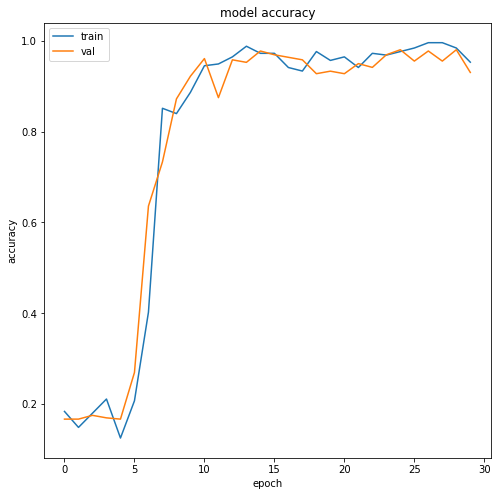

In [39]:
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

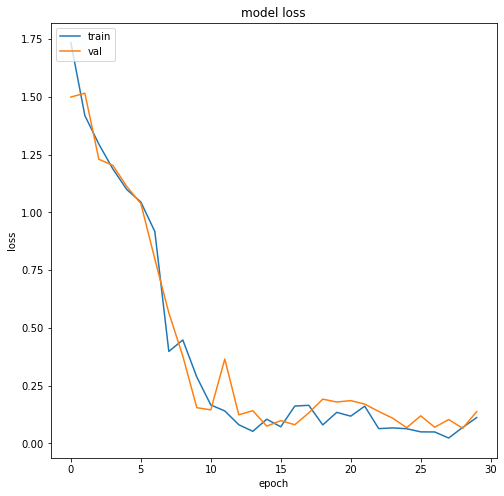

In [40]:
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [41]:
model.save('DefectModel.h5')

In [3]:
 model = load_model('../input/model1/DefectModel.h5')

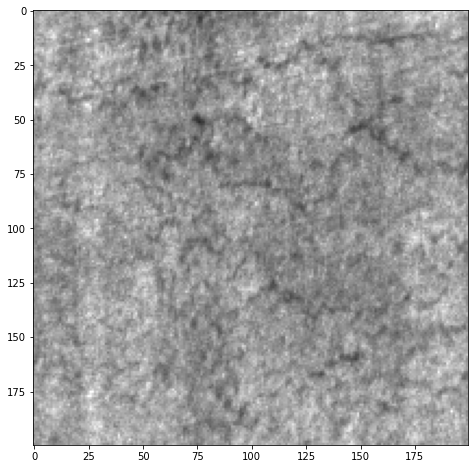

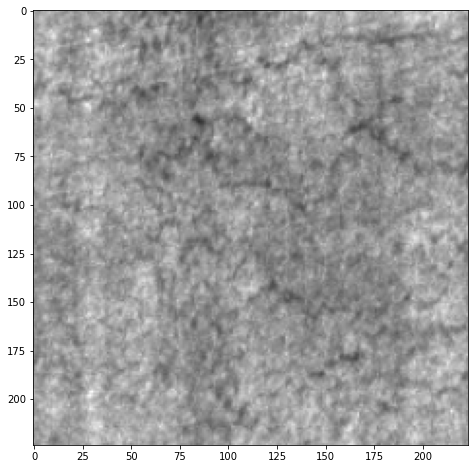

0


In [48]:
from imageio import imread
image = imread('../input/neu-surface-defect-database/NEU-DET/train/images/crazing/crazing_101.jpg')
plt.imshow(image)
plt.show()
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
new_arr = cv2.resize(image,(224,224))
plt.imshow(new_arr)
plt.show()
test = np.expand_dims(new_arr, axis=0)
result = model.predict(test)
result = np.argmax(result)
print(result)